In [ ]:
# PY1010 Prosjektoppgave, v04
# ## Maria Andriana Dalen, MAD
# ### 2025-04-06

In [4]:
# Del a) Program som leser inn en excel fil og lagrer data i de ulike kolonnene

import pandas as pd

# Les excel-fil (Må ligge samme sted som .ipynb.filen)
df = pd.read_excel("support_uke_24.xlsx")

# Hent data fra de ulike radene og kolonnene i excel-filen.
u_dag = df.iloc[:, 0].to_numpy()     # Kolonne 1 (Ukedag)
kl_slett = df.iloc[:, 1].to_numpy()  # Kolonne 2 (Klokkeslett)
varighet = df.iloc[:, 2].to_numpy()  # Kolonne 3 (Varighet)
score = df.iloc[:, 3].to_numpy()     # Kolonne 4 (Tilfredshet)

# df.iloc-funksjonen brukes for å hente ut data basert på rad- og kolonner i en DataFrame. 
# [:,0] vil si at vi henter ut alle radene i den første kolonnen. [:,1] henter data fra kolonne 2, etc.
# to_numpy() brukes for å skrive ut resultatet i en numpy array. 

# Skriv ut resultatet til skejrm
print("Ukedag:", u_dag)
print("Klokkeslett:", kl_slett)
print("Varlighet:", varighet)
print("Tilfredshet:", score)


Ukedag: ['Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Onsdag' 'Onsdag'
 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag

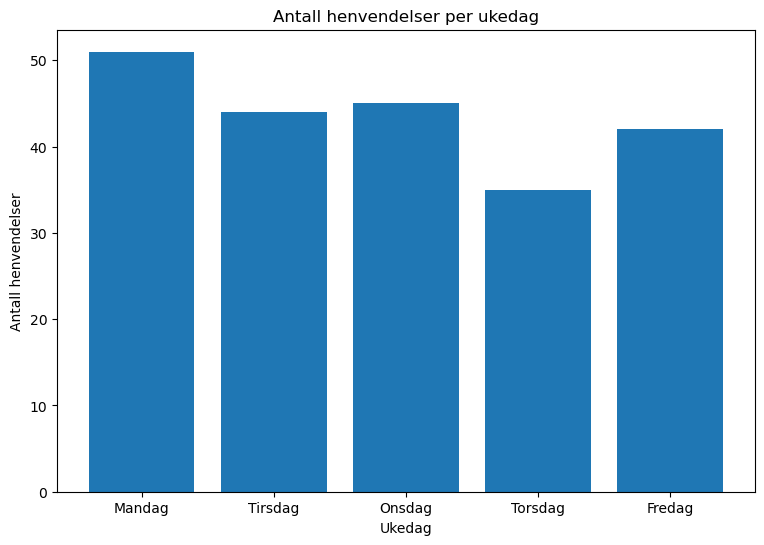

In [2]:
# Del b) Program som finner antall henvendelser for de 5 ukedagene (søylediagram).

import pandas as pd
import matplotlib.pyplot as plt

# Les excel-fil
df = pd.read_excel("support_uke_24.xlsx")

# Tell antall henvendelser pr ukedag
henvendelser_pr_dag = df['Ukedag'].value_counts()

# Sorter ukedagene i riktig rekkefølge
ukedager = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]
henvendelser_pr_dag = henvendelser_pr_dag.reindex(ukedager)  # Reindekserer ukedagene til riktig rekkefølge.

# Plot resultatet i et søylediagram
plt.figure(figsize=(9, 6))
plt.bar(henvendelser_pr_dag.index, henvendelser_pr_dag.values)
plt.title("Antall henvendelser per ukedag")
plt.xlabel("Ukedag")
plt.ylabel("Antall henvendelser")
plt.show()  # Viser diagrammet til skjerm


In [6]:
# Del c) Program som finner minste og lengste samtaletid i uke 24

import pandas as pd

# Les excel-fil
df = pd.read_excel("support_uke_24.xlsx")

#  Konverter kolonnen "Varighet" til tidsformat
df['Varighet'] = pd.to_timedelta(df['Varighet'])  # Konverterer kolonnen "Varighet" fra tekst til tidsverdier.

# Finn minste og største verdi
minste_varighet = df['Varighet'].min()   # Finn minste tid
lengste_varighet = df['Varighet'].max()  # Finn lengste tid

# Formater tiden uten antall dager. I dette tilfellet "0 days"
minste_varighet_tid = str(minste_varighet).split()[-1]
lengste_varighet_tid = str(lengste_varighet).split()[-1]

# str-funksjonen brukes for å konvertere tiden om til tekststreng.
# split-funksjonen deler verdiene opp i en liste, eks: ['0', 'days', '00:00:59']
# [-1] henter ut det siste elementet i listen, som her er tiden.

print(f'Minste samtaletid i uke 24: {minste_varighet_tid}')
print(f'Lengste samtaletid i uke 24:" {lengste_varighet_tid}')


Minste samtaletid i uke 24: 00:00:59
Lengste samtaletid i uke 24:" 00:11:28


In [8]:
# Del d) Gjennomsnittlig samtaletid i uke 24

import pandas as pd

# Les excel-fil
df = pd.read_excel("support_uke_24.xlsx")

# Konverter kolonnnen "Varighet" til tidsformat
df['Varighet'] = pd.to_timedelta(df['Varighet'])  # Konverterer kolonnen "Varighet" fra tekst til tidsverdier.

# Beregn gjennomsnittlig samtaletid
gjennomsnitt_samt_tid = df['Varighet'].mean()  # Finner gjensomsnittet av alle verdiene under "Varighet"

# Konverter fra timedelta-verdier(dd:hh:mm:ss) til minutter og sekunderi heltall
minutter = int(gjennomsnitt_samt_tid.total_seconds() // 60)  # Regner om antall sekunder til hele minutter, // for heltallsdivisjon.
sekunder = int(gjennomsnitt_samt_tid.total_seconds() % 60)   # Finner resterende sekunder.

# For et mer lesbart resultat konverterer vi om fra tidsverdier (dd:hh:mm:ss) til minutter og sekunder.
# total_seconds() gjør om den totale tiden til sekunder.
# int() sørger for at vi får et heltall.
# "// 60" sørger for at vi regner om til hele minutter, og dermed ignorerer desimaler ved deling.
# "% 60" finner sekundene som er til overs etter vi har trukket fra de hele minuttene.

# Skriv ut resultatet på en lettlest måte
print(f"Gjennomsnittlig samtaletid i uke 24: {minutter} minutter og {sekunder} sekunder.")


Gjennomsnittlig samtaletid i uke 24: 6 minutter og 40 sekunder.


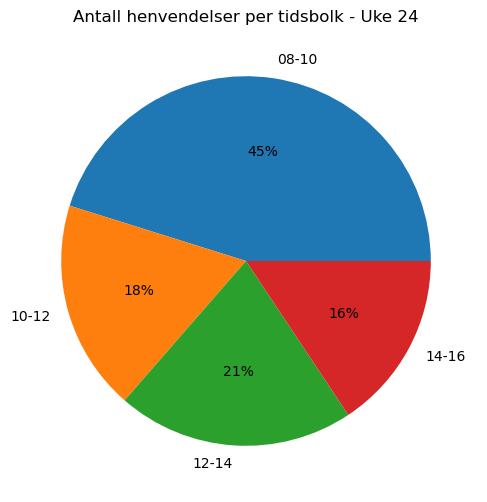

In [12]:
# Del e) Sektordiagram som viser antall henvendelser per tidsbolk

import pandas as pd
import matplotlib.pyplot as plt

# Les excel-fil
df = pd.read_excel("support_uke_24.xlsx")

# Funksjon som konverterer timeverdiene til tidsbolker
def tidspunkt_bolk(tid):
    if 8 <= tid < 10:
        return "08-10"
    elif 10 <= tid < 12:
        return "10-12"
    elif 12 <= tid < 14:
        return "12-14"
    elif 14 <= tid < 16:
        return "14-16"

# Konverter klokkeslettet fra tekst til datetime-format
df['Klokkeslett'] = pd.to_datetime(df['Klokkeslett'], format="%H:%M:%S")  # Gjør om fra tekst til tid

# Hent ut timeverdien fra klokkelettet
kl_slett = df["Klokkeslett"].dt.hour

# Finn ut hvilken tidsbolk timeverdiene tilhører
df["Tidsbolk"] = [tidspunkt_bolk(tid) for tid in kl_slett] # Oppretter DataFrame-kolonnen "Tidsbolk" som sorterer klokkeslettene i angitte tidsbolker.

# Tell antall henvendelser per tidsbolk og sorter i riktig rekkefølge
tell_henvendelser = df["Tidsbolk"].value_counts().reindex(["08-10", "10-12", "12-14", "14-16"], fill_value=0)

# Plot resultatet i et sektordiagram
plt.figure(figsize=(8, 6))
plt.pie(tell_henvendelser.values, labels=tell_henvendelser.index, autopct="%1.0f%%")  # Resultat uten desimaler
plt.title("Antall henvendelser per tidsbolk - Uke 24")
plt.show()

In [39]:
# Del f) Supportavdelingens NPS

import pandas as pd

# Les excel-fil
df = pd.read_excel("support_uke_24.xlsx")

# Hent ut tilfreds/score-kolonnen som en liste, og fjern NaN-verdier
score = df['Tilfredshet'].dropna().tolist()

# Tell antall score i hver kategori (Teller ved å legge til 1 for hver gang angitt score oppfylles)
negativ = sum(1 for s in score if 1 <= s <= 6)   # Teller score mellom 1-6 (Negativ) 
noytral = sum(1 for s in score if 7 <= s <= 8)   # Teller score mellom 7-8 (Nøytral)
positiv = sum(1 for s in score if 9 <= s <= 10)  # Teller score mellom 9-10 (Positiv)

# Beregn total antall kunder
total_kunder = negativ + noytral + positiv

# Beregn porosentandel negative kunder
if total_kunder > 0:
    prosent_negativ = (negativ / total_kunder) * 100
else: 
    prosent_negativ = 0  # Dersom det ikke finnes noen negative kunder, blir svaret 0% negative.

# Beregn prosentandel positive kunder
if total_kunder > 0:
    prosent_positiv = (positiv / total_kunder) * 100
else:
    prosent_positiv = 0

# Regn ut NPS-score
nps_score = prosent_positiv - prosent_negativ

# Skriv ut resultatet av NPS-score
print(f'Antall kunder: {total_kunder}')
print(f'Negative: {negativ}')
print(f'Nøytrale: {noytral}')
print(f'Positive: {positiv}')
print(f'Net Promoter Score (NPS) i uke 24: {nps_score:.2f}')  # Skriver ut svaret med to desimaler

Antall kunder: 43
Negative: 10
Nøytrale: 5
Positive: 28
Net Promoter Score (NPS) i uke 24: 41.86
